###  Building Neural Network For Handwritten Digits Classification

##### In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

##### Author - Kumar Ankit 

In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np 

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()  ## Loading the mnist dataset from inbuilt keras 

11493376/11490434 [==============================] - 4s 0us/step


In [3]:
len(X_train)  ## Checking the len of X_train 

60000

In [4]:
len(X_test)   ## Checking the len of X_train 

10000

In [5]:
X_train.shape  ## Checking the shape  of X_train 

(60000, 28, 28)

In [6]:
X_test.shape   ## Checking the shape  of X_test 

(10000, 28, 28)

In [7]:
X_train[0]   ## Checking  all the values for  of X_train 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

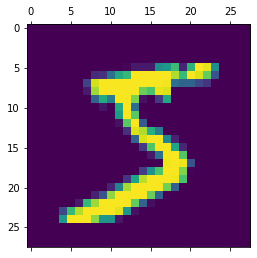

In [8]:
plt.matshow(X_train[0])  ## Printing with matplotlib  the value for position 0 for X_train

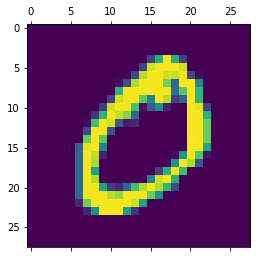

In [9]:
plt.matshow(X_train[1])  ## Printing with matplotlib  the value for position 1 for X_train

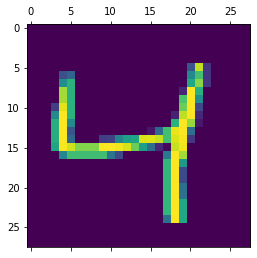

In [10]:
plt.matshow(X_train[2])   ## Printing with matplotlib  the value for position 2 for X_train

In [11]:
y_train[2]  ## Checking the value for position 2 for Y_train

4

In [12]:
y_train[1]  ## Checking the value for position 1 for Y_train

0

In [13]:
y_train[:6] ## To see first 6 samples 

array([5, 0, 4, 1, 9, 2], dtype=uint8)

In [21]:
X_train = X_train/255    ## For scaling so that our value should be betwn 0 and 1 
X_test = X_test/255

In [23]:
X_train[0]    ## Checkinh the output for X_train 

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [24]:
X_train_flattened = X_train.reshape(len(X_train),28*28)  ## To Covert 28/28 2d  matrix to 1 -d matrix of 784(28*28)
X_train_flattened.shape

(60000, 784)

In [25]:
X_test_flattened = X_test.reshape(len(X_test),28*28)  ## Flattened X_test nd checking the shape
X_test_flattened.shape

(10000, 784)

In [26]:
X_train_flattened[0]  ## Checking the values for X_train for position 0

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [29]:
model = keras.Sequential([     Building a model 
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  ## Proving dense layer , input_shape & activation functn
])

model.compile(optimizer='adam',   ## Providing the parameters as optimizer 
              loss='sparse_categorical_crossentropy',  ## Giving our loss as categorical_crossentropy
              metrics=['accuracy'])   ## Giving matrix as Accuracy 

model.fit(X_train_flattened, y_train, epochs=5)   ## Fitting our model with epocs = 5

Epoch 1/5
1875/1875 [==============================] - 2s 684us/step - loss: 0.7203 - accuracy: 0.8150
Epoch 2/5
1875/1875 [==============================] - 1s 647us/step - loss: 0.3112 - accuracy: 0.9139
Epoch 3/5
1875/1875 [==============================] - 1s 683us/step - loss: 0.2822 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 1s 667us/step - loss: 0.2702 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.2569 - accuracy: 0.92 - 1s 676us/step - loss: 0.2573 - accuracy: 0.9277


In [30]:
model.evaluate(X_test_flattened,y_test)  ## Evaluating the model

313/313 [==============================] - 0s 580us/step - loss: 0.2676 - accuracy: 0.9253


[0.2675867974758148, 0.9253000020980835]

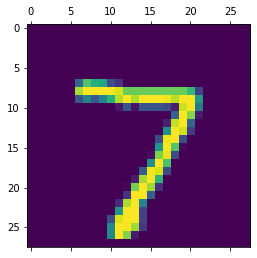

In [33]:
plt.matshow(X_test[0])   ## Plotting Zeroth postion for X_test

In [35]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.0680517e-02, 2.4925839e-07, 5.9593379e-02, 9.5664358e-01,
       3.2229424e-03, 1.0548967e-01, 1.2748569e-06, 9.9980986e-01,
       8.2758456e-02, 5.4779267e-01], dtype=float32)

In [36]:
np.argmax(y_predicted[0])  ## Finding out the max value 

7

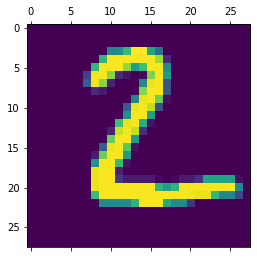

In [38]:
plt.matshow(X_test[1])   ## Plotting 1st postion for X_test

In [40]:
y_predicted = model.predict(X_test_flattened) ## so  it is giving the output for the position 1 i.e 2 with 10 value from 0 to 9
y_predicted[1]

array([3.2178813e-01, 2.7186871e-03, 9.9964607e-01, 2.5893164e-01,
       6.7020728e-10, 8.2016075e-01, 8.3208966e-01, 1.0949966e-12,
       1.1144078e-01, 1.0139294e-09], dtype=float32)

In [42]:
np.argmax(y_predicted[1])  ## Finding out the max value 

2

In [43]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] ## For seperating the output in each class 

In [44]:
y_predicted_labels[:5]  ## checking first 5 value 

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)  ## Checking confusion matrix 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    1,    0,    4,    7,    3,    1,    0],
       [   0, 1108,    4,    2,    1,    1,    4,    2,   13,    0],
       [   4,    6,  943,   14,    9,    3,   10,   11,   30,    2],
       [   2,    0,   23,  921,    0,   21,    2,   13,   23,    5],
       [   2,    1,    6,    0,  932,    0,    7,    4,    8,   22],
       [   9,    2,    8,   37,   13,  770,   11,    7,   30,    5],
       [  11,    3,   11,    1,    7,   14,  907,    2,    2,    0],
       [   1,    5,   23,    7,   10,    0,    0,  958,    1,   23],
       [   9,    6,    8,   20,   10,   26,    9,   13,  868,    5],
       [  11,    7,    1,   11,   47,    8,    0,   35,    5,  884]])>

Text(69.0, 0.5, 'Truth')

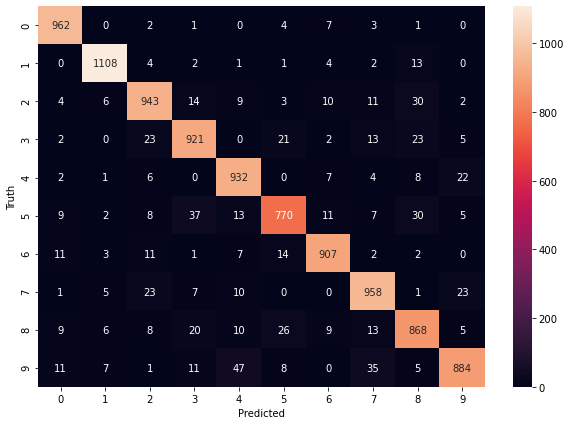

In [46]:
import seaborn as sn    ## To visualize confusion matrix plotting with seaborn 
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Using hidden layer

In [47]:
model = keras.Sequential([          ## Trained our model 
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',      ## NEed to compile the model for evaluating 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4609 - accuracy: 0.8696
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1344 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0855 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0497 - accuracy: 0.9854


In [48]:
model.evaluate(X_test_flattened,y_test)   ## Evaluating our model 

313/313 [==============================] - 0s 743us/step - loss: 0.0808 - accuracy: 0.9748


[0.08076352626085281, 0.9747999906539917]

In [49]:
model = keras.Sequential([          ## Training  our model with epoch = 4
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',      ## NEed to compile the model for evaluating 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=4)

Epoch 1/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4519 - accuracy: 0.8717: 0s - loss:
Epoch 2/4
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1365 - accuracy: 0.9593
Epoch 3/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0877 - accuracy: 0.9741
Epoch 4/4
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9804


In [50]:
model.evaluate(X_test_flattened,y_test)   ## Evaluating our model 

313/313 [==============================] - 0s 780us/step - loss: 0.0847 - accuracy: 0.9747


[0.08470665663480759, 0.9746999740600586]

Text(69.0, 0.5, 'Truth')

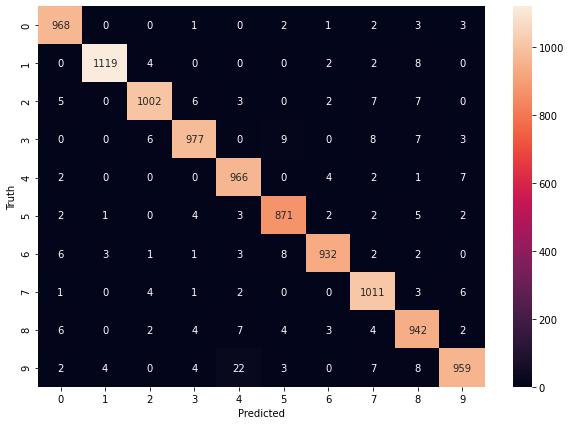

In [51]:
y_predicted = model.predict(X_test_flattened)     ## Predicting our model 
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels) ## Printing confusion matrix for model 

plt.figure(figsize = (10,7))  ## Giving seaborn parameter
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [52]:
model = keras.Sequential([          ## Trained our model 
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',      ## NEed to compile the model for evaluating 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=10)   ## This tym giving epocs = 10

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4726 - accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1255 - accuracy: 0.9625
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0863 - accuracy: 0.9745
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0638 - accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0509 - accuracy: 0.9846
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0380 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0319 - accuracy: 0.9902
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0244 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0220 - accuracy: 0.9932
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.017

In [53]:
model.evaluate(X_test_flattened,y_test) ## Evaluating our model 

313/313 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9794


[0.08236217498779297, 0.9793999791145325]

Text(69.0, 0.5, 'Truth')

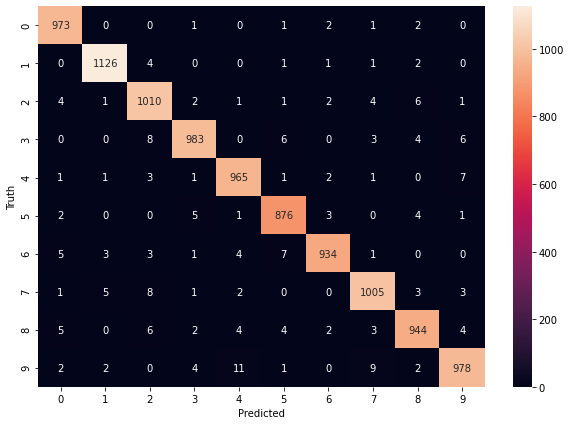

In [54]:
y_predicted = model.predict(X_test_flattened)  ## Predicting our model
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)  ## Printing confusion matrix

plt.figure(figsize = (10,7))  ## Providing plt parameter
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Using Flatten layer so that we don't have to call .reshape on input dataset

In [55]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  ## Just adding Flatten to our model so that we dont need to give reshape alltym
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',     ## Giving compile paraeters 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)   ## FItting or model and giving epcos = 10

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4505 - accuracy: 0.8730
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1320 - accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0848 - accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0654 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0499 - accuracy: 0.9855
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0386 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0320 - accuracy: 0.9905
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0268 - accuracy: 0.9920
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0209 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.016

In [56]:
model.evaluate(X_test,y_test)    ## Now Evaluating our model 

313/313 [==============================] - 0s 781us/step - loss: 0.0881 - accuracy: 0.9741


[0.08807854354381561, 0.9740999937057495]